# **SCI 111 - Zomato Recommendation - Data Analysis**

## **Authors of this Repository**
- **Binwag, Louis G. III** - [@louisuwie](https://github.com/louis-uwie)
- **Lozada, Godwyn I** - [@godwynlozada](https://github.com/godwynlozada)

<!-- CSCI 111 is a class that teaches how Artificial Intelligence (AI) think. 
The class first dwells into basic data structures that concern with how AI may approach decision making processes (i.e., Breadth-First-Search, Depth-First-Search, A* Algorithm, etc.). 

Data structures help us understand and visualize easier how "problem solving Agents" think. These are classifications of Agents that have a degree of what they can essentially 'solve' (i.e., Problem-Based Agent, Supervised or Unsupervised Agents, etc.) ...

After understanding solving Agents, we move into the basics of Machine Learning which includes Data Transformation, Decision Trees, K-Nearest Neighbours (kNN), and Clustering. This is where we first try Jupyter in programming a script that uses various models in transforming, manipulating, and analysing datasets.

Lastly, we tackle Logical Agents. This is adding more logic towards what we previously learned as problem solving Agents where we use propositional logic, inferences, and entailment to establish how we can visualize how an Agent might look at a problem (i.e., Truth table, Inference diagrams, Logical statements / sentences, Knowledge Base (KB)) --> 

# **I. Initial Set Up**

## **Project on Evaluating Machine Learning Models.**
 
**Instructions.** Select a dataset from [UCI](https://archive.ics.uci.edu/ml/datasets.php) or [Google](https://datasetsearch.research.google.com/), formulate a machine learning problem (supervised or unsupervised), and build and evaluate two models (different methods) that solve the problem. Any programming language may be used. 
- You may also use other legitimate sources at the same level of the UCI and Google sites provided. 
- You may use methods not taught in class. KNN is not an option. 
- You may also use a portion of the dataset if its size causes problems (e.g. reduce the number of rows)

**Deliverables.** In a Google Drive folder that I can access, submit the following: 
- Source code and executables
- Instructions on how to use your resources (i.e. your program)
- Slide deck explaining your work
- Recorded video presentation of your work (approx 20-30mins)

**Expected Output.**
- Jupyter Notebook (.ipynb)
- Resources (csv unclean and cleaned)
- Video Presentation
- Slide Deck Presentation

---

# **II. Data Set**

**Dataset Overview.**

The dataset contains raw information sourced from the Zomato Recommendation Platform for restaurants based in Pune, India, covering the year 2023. Each row corresponds to a single restaurant entry and includes a variety of attributes such as the restaurant’s name, multiple types of cuisine offered (up to eight slots), its categorized food type, the average cost for two people, the locality within Pune, and the average customer dining rating.

This dataset provides a foundation for predictive modeling and exploratory analysis, as it blends both categorical (e.g., cuisine types, locality) and numerical (e.g., rating, pricing) data. Through this structure, we can investigate patterns in consumer preferences, identify key factors influencing restaurant ratings, and evaluate the performance of machine learning models like Decision Trees and Mixed Naive Bayes in classifying highly rated restaurants.

| **Features**              | **Short Explanation**                                                         | **Possible Values / Example**                 |
| ------------------------ | ----------------------------------------------------------------------------- | --------------------------------------------- |
| `Restaurant_Name`        | Name of the restaurant listed on Zomato                                       | `"Le Plaisir"`, `"Savya Rasa"`                |
| `Cuisine1` to `Cuisine8` | Different types of cuisines offered by the restaurant, in order of prominence | `"South Indian"`, `"Desserts"`, `"MISSING"`   |
| `Category`               | Grouped categories combining all cuisine types into a readable list           | `"Cafe, Italian, Continental..."`             |
| `Pricing_for_2`          | Approximate cost for two people, in INR                                       | `600`, `1200`, `2100`                         |
| `Locality in Pune`       | Location/neighborhood of the restaurant in Pune                               | `"Koregaon Park"`, `"Baner"`, `"Viman Nagar"` |
| `Dining_Rating`          | Average customer rating of the restaurant (out of 5)                          | `4.2`, `3.8`, `4.9`                           |


---


# **III. Ideal Pipeline**

Our goal for this analysis is to be able to determine which model is able to more accurately predict what are the top restaurants in the locale (possibly depending on cuisines, locality, or average price.) <!-- Expound >

**1. Data Preprocessing**
- Load and Inspection of data.
- Cleaning the data (i.e. Tableau) <!-- care of Godwyn -->

**2. Exploratory Data Analysis (EDA)**
- This will be more on understanding which features create a reactive effect towards the rest of the feature. 
- Identifies which feature is able to change the course of the data. From there, we will implement the models.

**3. Decision Tree Implementation 1 (DT1)**
- This will be one of the initial basis of our model apart from EDA.

**4. Apply Decision Tree Implementation 2 (DT2)**
- The second implementation of Decision Tree will consist of the data set where we have omitted certain features (To be identified soon. _i.e., MISSING values, certain irrelevant features_) based on our domain knowledge.
- Comparing this to Decision Tree Implementation 1, we may be able to justify that omitting certain "junk" features can make Decision Tree model more accurate.

**5. Apply Mixed Naive Bayes (MNB)**
- The final model we use in this study is the Mixed Naive Bayes (MNB) classifier. This model is a variation of the standard Naive Bayes algorithm that allows us to handle both categorical and continuous features—whic makes it especially well-suited for real-world datasets like Zomato’s, where variables such as cuisine type (categorical) and average price (numerical) coexist.

**6. Conclusion**
- Generally, through ***Exploratory Data Analysis (EDA) and both Decision Tree implementations***, you may conclude that certain features—such as Cuisine type, Locality, or Average Price—have a strong influence on whether a restaurant receives high ratings. _Features like 'MISSING' or non-informative columns could be confirmed as noise, negatively affecting model accuracy._
- Comparing ***Decision Tree 1 (all features) with Decision Tree 2 (cleaned features)***, you might find that:
    - Removing irrelevant or noisy features leads to higher accuracy and simpler tree structures.
    - This supports the idea that domain knowledge-based feature pruning improves model performance.
- ***Mixed Naive Bayes (MNB) might perform competitively or better on some metrics*** (like precision or recall) compared to Decision Trees, especially in cases where feature independence is mostly true. However, MNB might underperform if features are highly correlated, where Decision Trees can better handle interactions.

---

# **IV. Data Preprocessing**

< This section will include general importing and inspection of the data. Cleaning the data as well for nullified or duplicated values. > <!-- Expound more >

In [3237]:
## Assume that we do not have the necessary libraries installed. 
%pip install pandas numpy matplotlib seaborn scikit-learn mixed-naive-bayes graphviz #This is to install the libraries needed to run the code.
%pip install --upgrade pip #Updates pip

# Need to install tkinter.
# For mac: brew install python-tk

import pandas as pd
import numpy as np
# import tkinter as tk
# from tkinter import filedialog

import math

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold ## https://www.geeksforgeeks.org/cross-validation-machine-learning/
from mixed_naive_bayes import MixedNB

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## Use if you are using Google Drive
import io

## Use if you are using Google Colab
# from google.colab import files
# uploaded = files.upload()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3238]:
## If using Jupyter Notebook / Run Locally via VS Code. Import the file LOZADA, BINWAG, CSCI 211 Zomato Dataset Pune.csv
# Hardcoded file path to your dataset
file_path = "LOZADA, BINWAG, CSCI 211 Zomato Dataset Pune.csv"
zomato_pune = pd.read_csv(file_path)

# Create a working copy for analysis
zomato_for_eda = zomato_pune.copy()

# Display the data
zomato_for_eda.head()

,Restaurant_Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8,Category,Pricing_for_2,Locality in Pune,Dining_Rating
0,Santè Spa Cuisine,European,Healthy Food,Mediterranean,MISSING,MISSING,MISSING,MISSING,MISSING,"Continental, Healthy Food, Mediterranean",1200,Koregaon Park,4.9
1,Le Plaisir,Coffee and Tea,European,European,Healthy Food,Sandwich,Other Indian,Beverages,MISSING,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,Deccan Gymkhana,4.9
2,Gong,East Asian,East Asian,Asian (unspecified),Himalayan,Beverages,MISSING,MISSING,MISSING,"Chinese, Sushi, Asian, Momos, Beverages",1700,Baner,4.9
3,The French Window Patisserie,Coffee and Tea,Desserts,European,Bakery,European,MISSING,MISSING,MISSING,"Cafe, Desserts, French, Bakery, European",600,Koregaon Park,4.9
4,Savya Rasa,South Indian,South Indian,South Indian,South Indian,Beverages,MISSING,MISSING,MISSING,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,Koregaon Park,4.9


In [3239]:
# Display the data
zomato_for_eda.tail()

,Restaurant_Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8,Category,Pricing_for_2,Locality in Pune,Dining_Rating
4792,Atharva Pure Veg,North Indian,South Indian,East Asian,Fast Food,Desserts,Ice Cream,Beverages,MISSING,"North Indian, South Indian, Chinese, Fast Food...",600,Bhosari,3.0
4793,Wow! Momo,Himalayan,Himalayan,Fast Food,MISSING,MISSING,MISSING,MISSING,MISSING,"Momos, Tibetan, Fast Food",400,Kothrud,3.0
4794,Fried Chicken Destination,Fast Food,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,Fast Food,400,Kothrud,3.0
4795,Hotel Shree Yash,North Indian,Indian (other),Indian (other),North Indian,Seafood,Chinese,MISSING,MISSING,"North Indian, Biryani, Mughlai, Maharashtrian,...",1000,Bhosari,3.0
4796,Vegeta Express,North Indian,European,East Asian,Desserts,Beverages,MISSING,MISSING,MISSING,"North Indian, Continental, Chinese, Desserts, ...",850,Wanowrie,3.0


## **Restaurant Count per Locality**

/var/folders/rz/4xd8tc_14738bgn0jt46tk_w0000gn/T/ipykernel_49338/1320282737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locality_counts.head(15).values, y=locality_counts.head(15).index, palette="viridis")


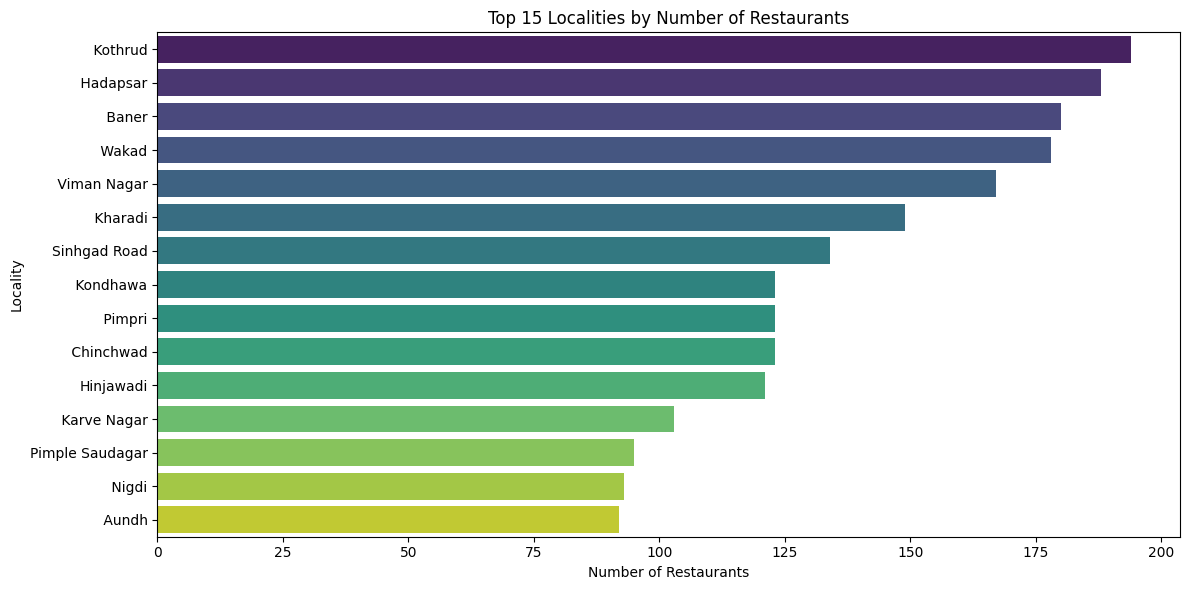

In [3240]:
# Count restaurants per locality
locality_counts = zomato_for_eda['Locality in Pune'].value_counts()

# Plot the top 15
plt.figure(figsize=(12, 6))
sns.barplot(x=locality_counts.head(15).values, y=locality_counts.head(15).index, palette="viridis")

plt.title("Top 15 Localities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()

## **Listing All Cuisines**

In [3241]:
# List of cuisine columns
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]

# Flatten, drop NAs and "MISSING", then get unique values
all_cuisines = pd.unique(
    zomato_for_eda[cuisine_cols]
    .values
    .ravel()
)

# Clean list
unique_cuisines = sorted([c for c in all_cuisines if pd.notna(c) and c != 'MISSING'])

# Display
print("Number of unique cuisines:", len(unique_cuisines))
print(unique_cuisines)


Number of unique cuisines: 46
['Asian', 'Asian (unspecified)', 'BBQ', 'Bakery', 'Bar Food', 'Beverages', 'Burger', 'Chinese', 'Coffee', 'Coffee and Tea', 'Desserts', 'East Asian', 'European', 'Fast Food', 'Finger Food', 'Healthy Food', 'Himalayan', 'Ice Cream', 'Indian (other)', 'Juices', 'Kebab', 'Korean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'North Eastern', 'North Indian', 'Oriental', 'Other Indian', 'Paan', 'Pasta', 'Pizza', 'Quick eats', 'Rajasthani', 'Raw Meats', 'Roast Chicken', 'Rolls', 'Sandwich', 'Seafood', 'South Indian', 'Southeast Asian', 'Steak', 'Street Food', 'Tea', 'The Americas', 'Wraps']


## **Correlation between Pricing_for_2 and Dining_Rating.**
This is to be able to understand if pricing is "cheaper" gains a better rating as a restaurant. However, this is just a shallow experiment as Pricing can't be the only factor in a high-rating. 

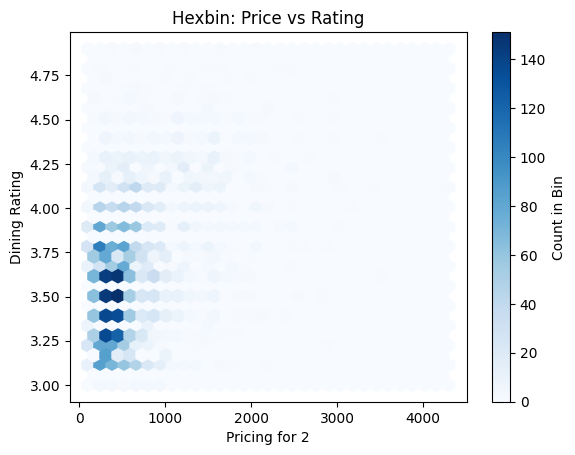

In [3242]:
plt.hexbin(zomato_for_eda['Pricing_for_2'], zomato_for_eda['Dining_Rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.xlabel('Pricing for 2')
plt.ylabel('Dining Rating')
plt.title('Hexbin: Price vs Rating')
plt.show()

In [3243]:
correlation = zomato_for_eda[['Pricing_for_2', 'Dining_Rating']].corr()
print("Correlation between Pricing and Rating:")
print(correlation)

Correlation between Pricing and Rating:
               Pricing_for_2  Dining_Rating
Pricing_for_2       1.000000       0.358431
Dining_Rating       0.358431       1.000000


## **Correlation between Locality and Cuisine (1-8) to Dining_Rating.**
We proceed to test if there is a correlation between a cuisine served in certain locality. Such that, if for instance, `Mediterranean` and `European` cuisines served in	`Koregaon Park` receives a high rating whilst `Coffee` and `Desserts` served in the same locale has low-ratings.

In [3244]:
# Reshape cuisine columns into one
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]

# Melt cuisine columns
long_df = zomato_for_eda.melt(
    id_vars=['Dining_Rating', 'Locality in Pune'],
    value_vars=cuisine_cols,
    var_name='CuisineCol',
    value_name='Cuisine'
)

# Drop missing cuisines
long_df = long_df.dropna(subset=['Cuisine'])

# Grouping
rating_by_combo = (
    long_df
    .groupby(['Cuisine', 'Locality in Pune'])['Dining_Rating']
    .mean()
    .reset_index()
    .rename(columns={'Dining_Rating': 'Avg_Rating'})
)

# Top 15 highest-rated cuisine-location combos.
# Maintains the original index of the row.
rating_by_combo.sort_values('Avg_Rating', ascending=False).head(15)

# Revises the index starting from 0.
# Uncomment if prefer to use original indexing.
    # cleaned_top = rating_by_combo.sort_values('Avg_Rating', ascending=False).head(15).reset_index(drop=True)
    # cleaned_top # Prints



,Cuisine,Locality in Pune,Avg_Rating
1322,Other Indian,Deccan Gymkhana,4.90
301,Coffee and Tea,Deccan Gymkhana,4.90
699,Healthy Food,Deccan Gymkhana,4.90
738,Himalayan,Baner,4.90
975,Kebab,Senapati Bapat Road,4.80
1689,South Indian,Koregaon Park,4.76
70,BBQ,Hinjawadi,4.70
687,Finger Food,Koregaon Park,4.70
290,Coffee,Kothrud,4.70
1095,Mediterranean,Koregaon Park,4.60


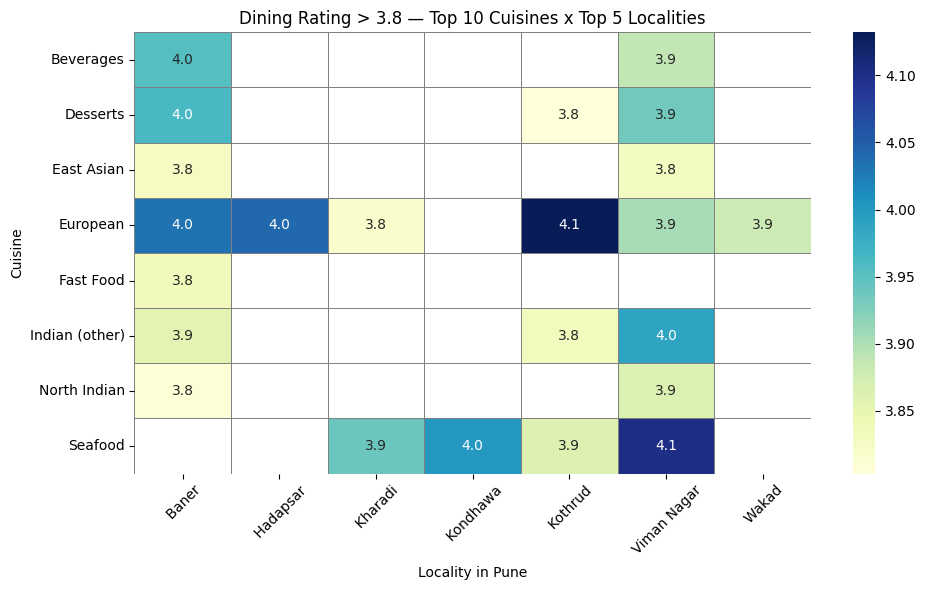

In [3245]:
# Filter to threshold. Only Avg_Rating over 3.8
filtered = rating_by_combo[rating_by_combo['Avg_Rating'] > 3.8]

# Keep only top cuisines and localities by frequency
top_cuisines = (
    long_df['Cuisine'].value_counts()
    .loc[lambda x: x.index != 'MISSING']
    .head(10).index
)

top_localities = long_df['Locality in Pune'].value_counts().head(10).index

# Apply filter
filtered = filtered[
    (filtered['Cuisine'].isin(top_cuisines)) &
    (filtered['Locality in Pune'].isin(top_localities))
]

# Pivot
heatmap_data = filtered.pivot(
    index="Cuisine",
    columns="Locality in Pune",
    values="Avg_Rating"
)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Dining Rating > 3.8 — Top 10 Cuisines x Top 5 Localities")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

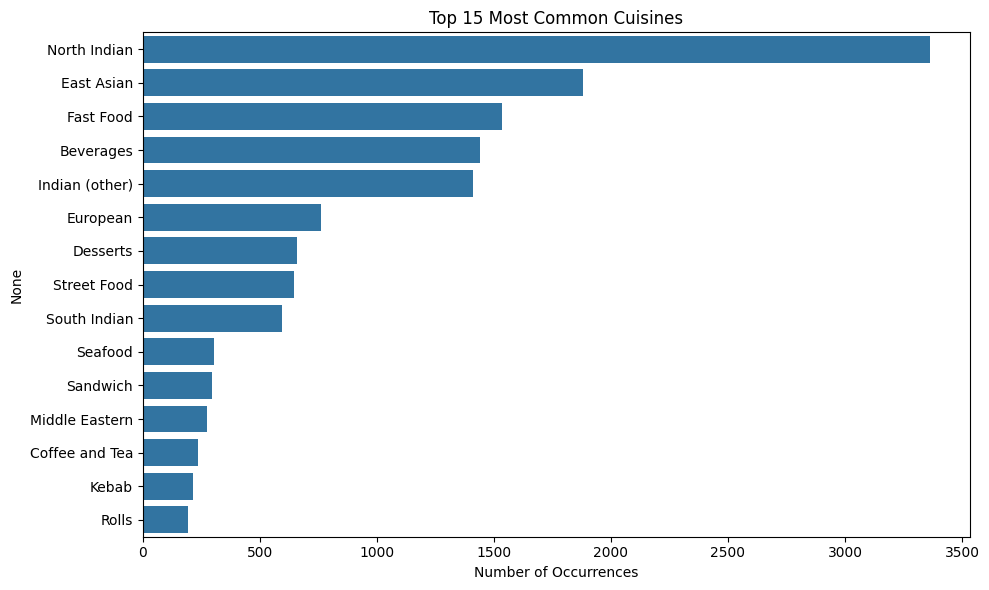

In [3246]:
# Define the features and filter the DataFrame
input_features = ["Cuisine1", "Cuisine2", "Cuisine3", "Cuisine4", 
                  "Cuisine5", "Cuisine6", "Cuisine7", "Cuisine8", 
                  "Pricing_for_2", "Locality in Pune"]

X = zomato_for_eda.filter(items=input_features)

# all cuisines
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]
cuisines_flat = pd.Series(X[cuisine_cols].values.ravel())

# Clean values
cuisines_flat = cuisines_flat.replace("MISSING", np.nan).dropna()

# Count top 15
cuisines_freq = cuisines_flat.value_counts().head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisines_freq.values, y=cuisines_freq.index)
plt.title("Top 15 Most Common Cuisines")
plt.xlabel("Number of Occurrences")
plt.tight_layout()
plt.show()


## **More EDA**

In [3247]:
# Set rating threshold
rating_threshold = 3.75

# First-level helper functions
def find_percent(df, feature_group, feature):
    feature_filter = df.loc[df[feature_group] == feature]
    if not feature_filter.empty:
        percent_above_cutoff = 100 - percentileofscore(
            feature_filter['Dining_Rating'], rating_threshold, kind='strict'
        )
    else:
        percent_above_cutoff = 0
    return percent_above_cutoff

def find_mean_rating(df, feature_group, feature):
    feature_filter = df.loc[df[feature_group] == feature]
    return feature_filter['Dining_Rating'].mean() if not feature_filter.empty else np.nan

# Second-level EDA helper
def eda_resto_data_numerical(df, feature_group):
    feature_list = pd.unique(df[feature_group]).tolist()
    feature_list2 = [feature for feature in feature_list if feature != 'MISSING' and pd.notnull(feature)]

    percent_exceeding_cutoff_feature = []
    average_per_cutoff_feature = []

    for feature in feature_list2:
        above_threshold = round(find_percent(df, feature_group, feature), 4)
        percent_exceeding_cutoff_feature.append(above_threshold)

        mean_rating = round(find_mean_rating(df, feature_group, feature), 4)
        average_per_cutoff_feature.append(mean_rating)

    # MinMax scaling
    scaler = MinMaxScaler()
    mean_scaled = scaler.fit_transform(np.array(average_per_cutoff_feature).reshape(-1, 1)).flatten()
    mean_scaled = [round(score, 4) for score in mean_scaled]

    # Create summary DataFrame
    df_mean_feature = pd.DataFrame({
        feature_group: feature_list2,
        '% Above 3.75': percent_exceeding_cutoff_feature,
        'Mean Rating': average_per_cutoff_feature,
        'MinMax Scale Score': mean_scaled
    })

    df_mean_feature = df_mean_feature.sort_values(by=['Mean Rating', feature_group], ascending=[False, True]).reset_index(drop=True)
    df_mean_feature['Rank'] = df_mean_feature.index + 1

    return df_mean_feature

In [3248]:
eda_locality = eda_resto_data_numerical(zomato_for_eda, 'Locality in Pune')
eda_locality.head()

,Locality in Pune,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Koregaon Park,79.7619,4.0833,1.0000,1
1,East Street,78.5714,4.0214,0.9234,2
2,Bopkhel,100.0000,4.0000,0.8969,3
3,Yerwada,75.0000,3.9000,0.7732,4
4,Kalyani Nagar,54.9020,3.8941,0.7659,5


In [3249]:
eda_resto_cuisine1 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine1')
eda_resto_cuisine1.head()

,Cuisine1,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Mediterranean,100.0000,4.3000,1.0000,1
1,Southeast Asian,85.7143,4.1429,0.7959,2
2,Bar Food,76.4706,4.0529,0.6790,3
3,Asian (unspecified),66.6667,3.9909,0.5985,4
4,European,69.6552,3.9683,0.5691,5


In [3250]:
eda_resto_cuisine2 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine2')
eda_resto_cuisine2.head()

,Cuisine2,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Steak,100.0000,4.4000,1.0000,1
1,Mediterranean,100.0000,4.1333,0.7205,2
2,BBQ,83.3333,4.1000,0.6856,3
3,Asian (unspecified),74.4681,4.0404,0.6231,4
4,Southeast Asian,74.0741,4.0222,0.6041,5


In [3251]:
eda_resto_cuisine3 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine3')
eda_resto_cuisine3.head()

,Cuisine3,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Raw Meats,100.0000,4.2000,1.0000,1
1,Oriental,83.3333,4.1667,0.9546,2
2,Mediterranean,60.0000,4.1400,0.9182,3
3,Healthy Food,77.7778,4.0556,0.8031,4
4,Asian (unspecified),82.8571,4.0457,0.7896,5


In [3252]:
eda_resto_cuisine4 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine4')
eda_resto_cuisine4.head()

,Cuisine4,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,BBQ,100.0000,4.4000,1.0000,1
1,Bakery,75.0000,4.2250,0.8250,2
2,Mediterranean,100.0000,4.2000,0.8000,3
3,Healthy Food,91.6667,4.1125,0.7125,4
4,Roast Chicken,100.0000,4.1000,0.7000,5


In [3253]:
eda_resto_cuisine5 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine5')
eda_resto_cuisine5.head()

,Cuisine5,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Steak,100.0000,4.3000,1.0000,1
1,Asian (unspecified),83.3333,4.1750,0.8399,2
2,Bakery,100.0000,4.1000,0.7439,3
3,The Americas,100.0000,4.0500,0.6799,4
4,BBQ,66.6667,4.0333,0.6585,5


In [3254]:
eda_resto_cuisine6 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine6')
eda_resto_cuisine6.head()

,Cuisine6,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Steak,100.0,4.30,1.0000,1
1,Asian (unspecified),100.0,4.20,0.8929,2
2,Quick eats,100.0,4.20,0.8929,3
3,Southeast Asian,100.0,4.15,0.8393,4
4,Healthy Food,80.0,4.00,0.6786,5


In [3255]:
eda_resto_cuisine7 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine7')
eda_resto_cuisine7.head()

/usr/local/Cellar/jupyterlab/4.4.2/libexec/lib/python3.13/site-packages/IPython/core/displayhook.py:292: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Cuisine7,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Coffee,100.0000,4.5000,1.0000,1
1,Pasta,100.0000,4.2000,0.7857,2
2,Healthy Food,100.0000,4.0000,0.6429,3
3,Burger,100.0000,3.9500,0.6071,4
4,European,71.4286,3.9286,0.5919,5


In [3256]:
eda_resto_cuisine8 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine8')
eda_resto_cuisine8.head()

,Cuisine8,% Above 3.75,Mean Rating,MinMax Scale Score,Rank
0,Tea,100.0000,4.3000,1.0000,1
1,Sandwich,50.0000,4.1000,0.7778,2
2,Mexican,100.0000,4.0000,0.6667,3
3,Burger,66.6667,3.9667,0.6297,4
4,Seafood,100.0000,3.9333,0.5926,5


In [3257]:
zomato_pune_yes = zomato_for_eda[zomato_for_eda['Dining_Rating'] >= 3.6]
zomato_pune_yes.head()

,Restaurant_Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8,Category,Pricing_for_2,Locality in Pune,Dining_Rating
0,Santè Spa Cuisine,European,Healthy Food,Mediterranean,MISSING,MISSING,MISSING,MISSING,MISSING,"Continental, Healthy Food, Mediterranean",1200,Koregaon Park,4.9
1,Le Plaisir,Coffee and Tea,European,European,Healthy Food,Sandwich,Other Indian,Beverages,MISSING,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,Deccan Gymkhana,4.9
2,Gong,East Asian,East Asian,Asian (unspecified),Himalayan,Beverages,MISSING,MISSING,MISSING,"Chinese, Sushi, Asian, Momos, Beverages",1700,Baner,4.9
3,The French Window Patisserie,Coffee and Tea,Desserts,European,Bakery,European,MISSING,MISSING,MISSING,"Cafe, Desserts, French, Bakery, European",600,Koregaon Park,4.9
4,Savya Rasa,South Indian,South Indian,South Indian,South Indian,Beverages,MISSING,MISSING,MISSING,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,Koregaon Park,4.9


In [3258]:
zomato_pune_no = zomato_for_eda[zomato_for_eda['Dining_Rating'] < 3.6]
zomato_pune_no.head()

,Restaurant_Name,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8,Category,Pricing_for_2,Locality in Pune,Dining_Rating
2657,P Town Bar,Bar Food,European,North Indian,Oriental,MISSING,MISSING,MISSING,MISSING,"Bar Food, Italian, North Indian, Chinese",1200,Balewadi,3.5
2658,Octant Pizza,East Asian,Healthy Food,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,"Chinese, Salad",600,JM Road,3.5
2659,The Basil Deck,North Indian,European,Indian (other),European,East Asian,Beverages,MISSING,MISSING,"North Indian, Continental, Mughlai, Italian, C...",1000,Erandwane,3.5
2660,P.K. Dum Biryani House,Indian (other),Middle Eastern,Indian (other),Oriental,Rajasthani,BBQ,East Asian,Desserts,"Biryani, Maharashtrian, Mughlai, Chinese, Nort...",800,Shivapur,3.5
2661,Aishwarya Shreejee Pure Veg,North Indian,South Indian,East Asian,Fast Food,Desserts,Beverages,MISSING,MISSING,"North Indian, South Indian, Chinese, Fast Food...",900,Dhankawadi,3.5


/var/folders/rz/4xd8tc_14738bgn0jt46tk_w0000gn/T/ipykernel_49338/445912212.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


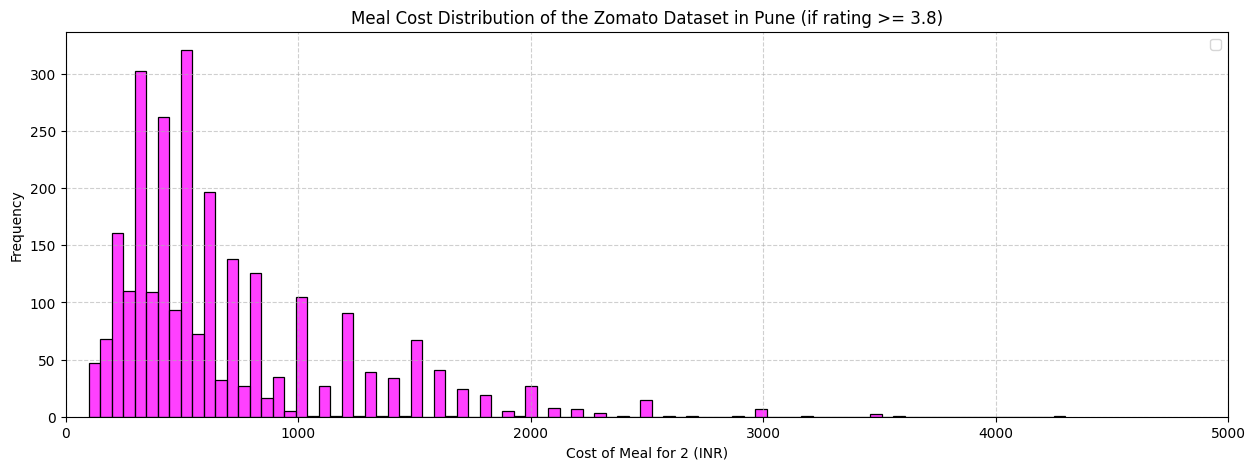

In [3259]:
min_cost = min(zomato_pune_yes['Pricing_for_2'])
max_cost = max(zomato_pune_yes['Pricing_for_2'])

num_bins = int((max_cost - min_cost) / 50) + 1
num_bins

plt.figure(figsize=(15, 5))
sns.histplot(zomato_pune_yes['Pricing_for_2'], bins = num_bins, color='magenta')
plt.title("Meal Cost Distribution of the Zomato Dataset in Pune (if rating >= 3.8)")
plt.xlabel("Cost of Meal for 2 (INR)")
plt.xlim(0, 5000)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/var/folders/rz/4xd8tc_14738bgn0jt46tk_w0000gn/T/ipykernel_49338/1147951327.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


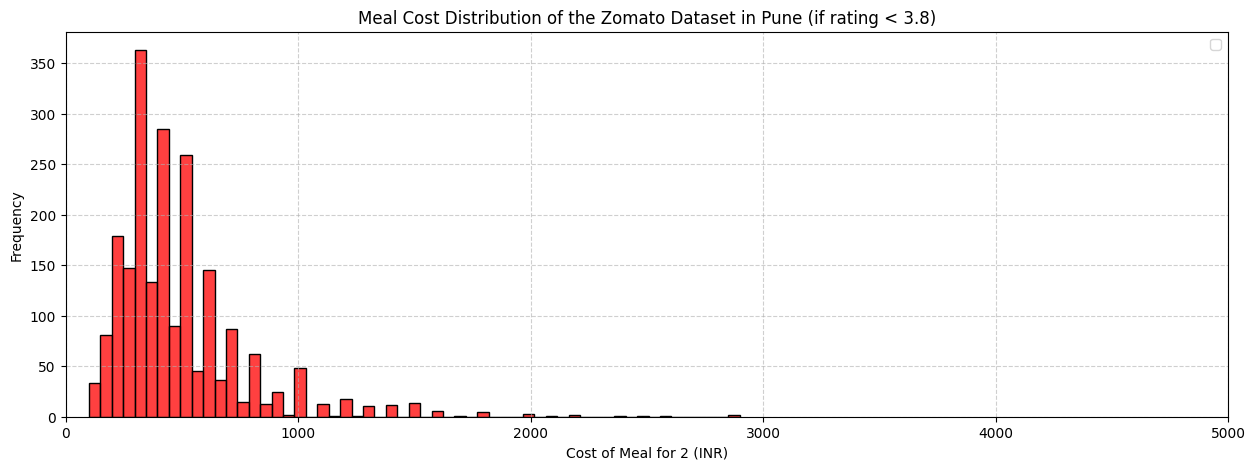

In [3260]:
min_cost = min(zomato_pune_no['Pricing_for_2'])
max_cost = max(zomato_pune_no['Pricing_for_2'])

num_bins = int((max_cost - min_cost) / 50) + 1
num_bins

plt.figure(figsize=(15, 5))
sns.histplot(zomato_pune_no['Pricing_for_2'], bins = num_bins, color='red')
plt.title("Meal Cost Distribution of the Zomato Dataset in Pune (if rating < 3.8)")
plt.xlabel("Cost of Meal for 2 (INR)")
plt.xlim(0, 5000)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [3261]:
## Map the cuisines to numerical features according

def feature_map(feature_df, row_feature):
    feature_map = {'MISSING' : 0}

    for index, row in feature_df.iterrows():
        feature_name = row[row_feature]
        rank = row['Rank']

        feature_map[feature_name] = rank
    return feature_map

# Create mappings for cuisine 1 to cuisine 8
cuisine1_map = feature_map(eda_resto_cuisine1, 'Cuisine1')
cuisine2_map = feature_map(eda_resto_cuisine2, 'Cuisine2')
cuisine3_map = feature_map(eda_resto_cuisine3, 'Cuisine3')
cuisine4_map = feature_map(eda_resto_cuisine4, 'Cuisine4')
cuisine5_map = feature_map(eda_resto_cuisine5, 'Cuisine5')
cuisine6_map = feature_map(eda_resto_cuisine6, 'Cuisine6')
cuisine7_map = feature_map(eda_resto_cuisine7, 'Cuisine7')
cuisine8_map = feature_map(eda_resto_cuisine8, 'Cuisine8')

# Create mapping for locality
locality_map = feature_map(eda_locality, 'Locality in Pune')

# map the columns for cuisine
zomato_for_eda['Cuisine1'] = zomato_for_eda['Cuisine1'].map(cuisine1_map)
zomato_for_eda['Cuisine2'] = zomato_for_eda['Cuisine2'].map(cuisine2_map)
zomato_for_eda['Cuisine3'] = zomato_for_eda['Cuisine3'].map(cuisine3_map)
zomato_for_eda['Cuisine4'] = zomato_for_eda['Cuisine4'].map(cuisine4_map)
zomato_for_eda['Cuisine5'] = zomato_for_eda['Cuisine5'].map(cuisine5_map)
zomato_for_eda['Cuisine6'] = zomato_for_eda['Cuisine6'].map(cuisine6_map)
zomato_for_eda['Cuisine7'] = zomato_for_eda['Cuisine7'].map(cuisine7_map)
zomato_for_eda['Cuisine8'] = zomato_for_eda['Cuisine8'].map(cuisine8_map)

# Map the columns for locality in Pune
zomato_for_eda['Locality in Pune'] = zomato_for_eda['Locality in Pune'].map(locality_map)

# Create binary classification column
zomato_for_eda['isHighRating'] = (zomato_for_eda['Dining_Rating'] >= rating_threshold).astype(int)

# Drop the original numerical rating column
zomato_for_eda = zomato_for_eda.drop(columns=['Dining_Rating'])

# Reorder columns to ensure binary classification is at the rightmost position
zomato_for_eda = zomato_for_eda[[col for col in zomato_for_eda.columns if col not in ['isHighRating']] + ['isHighRating']]

In [3262]:
input_features = ["Cuisine1", "Cuisine2", "Cuisine3", "Cuisine4", "Cuisine5", "Cuisine6", "Cuisine7", "Cuisine8", "Pricing_for_2", "Locality in Pune"]

X = zomato_for_eda.filter(items = input_features)
X

,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8,Pricing_for_2,Locality in Pune
0,5,9,3,0,0,0,0,0,1200,1
1,11,7,14,4,26,7,9,0,1000,11
2,30,25,5,26,19,0,0,0,1700,9
3,11,15,14,2,11,0,0,0,600,1
4,24,29,23,19,19,0,0,0,2100,1
...,...,...,...,...,...,...,...,...,...,...
4792,23,29,25,24,13,26,9,0,600,85
4793,26,34,24,0,0,0,0,0,400,25
4794,28,0,0,0,0,0,0,0,400,25
4795,23,18,29,30,18,30,0,0,1000,85


In [3263]:
y = zomato_for_eda["isHighRating"]
y

0       1
1       1
2       1
3       1
4       1
       ..
4792    0
4793    0
4794    0
4795    0
4796    0
Name: isHighRating, Length: 4797, dtype: int64

In [3264]:
from scipy.stats import ttest_ind

# Group pricing values
pricing_high = zomato_for_eda[zomato_for_eda['isHighRating'] == 1]['Pricing_for_2']
pricing_low = zomato_for_eda[zomato_for_eda['isHighRating'] == 0]['Pricing_for_2']

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(pricing_high, pricing_low, equal_var=False)  # Welch's t-test

print(f"T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Optional interpretation
if p_value < 0.05:
    print("he difference in pricing is statistically significant (p < 0.05).")
else:
    print("No significant difference in pricing (p ≥ 0.05).")


T-Test Results:
T-Statistic: 18.2155
P-Value: 0.0000
he difference in pricing is statistically significant (p < 0.05).


### **Post-EDA**

After testing various statistical methods for EDA, ...

---

# **V. Decision Tree Implementation 1 (DT1)** 

In [3265]:
## 70% train, 30% others (as a working concept, assume that other)
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [3266]:
dec_tree = DecisionTreeClassifier(random_state = 45)
dec_tree.fit(X_train, y_train)

print("DataFrame with MISSING set to 0:")
print(X_train.head())

DataFrame with MISSING set to 0:
      Cuisine1  Cuisine2  Cuisine3  Cuisine4  Cuisine5  Cuisine6  Cuisine7  \
4268        15        26        27        23         0         0         0   
2885        23        13         0         0         0         0         0   
1489        23        27         0         0         0         0         0   
1357        27         0         0         0         0         0         0   
1130        23        25         0         0         0         0         0   

      Cuisine8  Pricing_for_2  Locality in Pune  
4268         0            300                42  
2885         0            600                63  
1489         0            200                31  
1357         0            150                64  
1130         0            450                25  


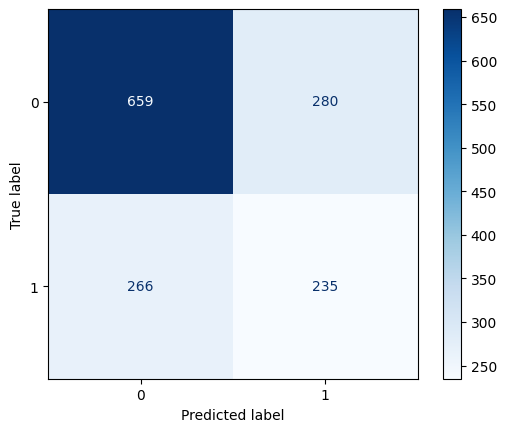

In [3267]:
y_pred = dec_tree.predict(X_other)
cm = confusion_matrix(y_other, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = dec_tree.classes_)
cm_display.plot(cmap = plt.cm.Blues)
plt.show()

In [3268]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
accuracy = accuracy_score(y_other, y_pred)
print(f"True Positives: {tp}")
print(f"Sensitivity: {sensitivity*100:.2f} %")
print(f"Specificity: {specificity*100:.2f} %")
print(f"Accuracy: {accuracy*100:.2f} %")


True Positives: 235
Sensitivity: 46.91 %
Specificity: 70.18 %
Accuracy: 62.08 %


The current Decisition Tree (DT1) implementation consists of the basic cleaned data. This means that we've decided to keep the `MISSING` values that occur in the way the data is collected. While restaurants may have 1-2 cuisines, some have over 2 cuisines served. This is the reason why there is `cuisine 1 to 8` in the dataset. As such, `MISSING` values may incur false-negative results in predicting `Dining_Ratings`. In this case, DT1 has an accuracy of `62.08%`.

## **VI. Decision Tree Implementation 2 (DT2)**

For DT2, the dataset has been further cleaned by removing ` MISSING ` values and making sure that there are no _"Junk"_ data that possibly makes Decision Trees lose its accuracy.

In [3269]:
# Replace 'MISSING' (0) with -1
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]
X_all = zomato_for_eda.drop(columns=['isHighRating']).copy()
X_all[cuisine_cols] = X_all[cuisine_cols].replace(0, -1)

# Keep only numeric columns (drop Restaurant_Name etc.)
X_clean = X_all.select_dtypes(include=[np.number])
y_clean = zomato_for_eda['isHighRating']

print("Cleaned DataFrame with MISSING features replaced with -1:")
print(X_clean.head())


Cleaned DataFrame with MISSING features replaced with -1:
   Cuisine1  Cuisine2  Cuisine3  Cuisine4  Cuisine5  Cuisine6  Cuisine7  \
0         5         9         3        -1        -1        -1        -1   
1        11         7        14         4        26         7         9   
2        30        25         5        26        19        -1        -1   
3        11        15        14         2        11        -1        -1   
4        24        29        23        19        19        -1        -1   

   Cuisine8  Pricing_for_2  Locality in Pune  
0        -1           1200                 1  
1        -1           1000                11  
2        -1           1700                 9  
3        -1            600                 1  
4        -1           2100                 1  


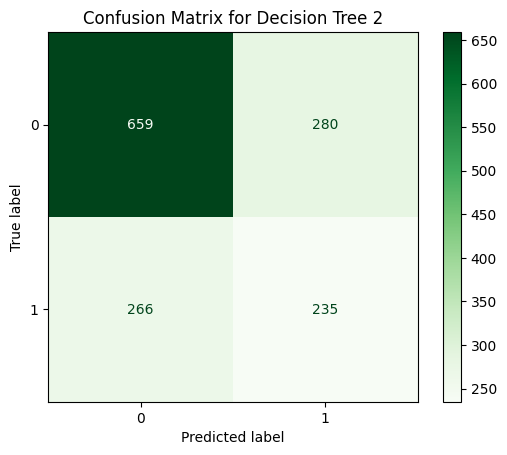

In [3270]:
# Train-test split
X_train2, X_other2, y_train2, y_other2 = train_test_split(X_clean, y_clean, test_size=0.3, random_state=45)

# Train the model
dec_tree2 = DecisionTreeClassifier(random_state=45)
dec_tree2.fit(X_train2, y_train2)

# Predict and evaluate
y_pred2 = dec_tree2.predict(X_other2)
cm2 = confusion_matrix(y_other2, y_pred2)
cm_display2 = ConfusionMatrixDisplay(cm2, display_labels=dec_tree2.classes_)
cm_display2.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix for Decision Tree 2")
plt.show()

In [3271]:
# Metrics
tn2, fp2, fn2, tp2 = cm2.ravel()
sensitivity2 = tp2 / (tp2 + fn2) if (tp2 + fn2) != 0 else 0
specificity2 = tn2 / (tn2 + fp2) if (tn2 + fp2) != 0 else 0
accuracy2 = accuracy_score(y_other2, y_pred2)

print(f"Decision Tree 2 Metrics (Ignoring MISSING features):")
print(f"True Positives: {tp2}")
print(f"Sensitivity: {sensitivity2*100:.2f} %")
print(f"Specificity: {specificity2*100:.2f} %")
print(f"Accuracy: {accuracy2*100:.2f} %")

Decision Tree 2 Metrics (Ignoring MISSING features):
True Positives: 235
Sensitivity: 46.91 %
Specificity: 70.18 %
Accuracy: 62.08 %


In [3272]:
feature_importances = pd.Series(dec_tree2.feature_importances_, index=X_clean.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(10))

Locality in Pune    0.288970
Pricing_for_2       0.242121
Cuisine2            0.108773
Cuisine1            0.107196
Cuisine3            0.101029
Cuisine4            0.077245
Cuisine5            0.043103
Cuisine6            0.024581
Cuisine7            0.005568
Cuisine8            0.001414
dtype: float64


## **Decision Tree Implementation 3 (DT3)**

Will removing `Cuisine 3-8` make the model mroe accurate? since, cuisines 3-8 have least importance and the fact that most have missing values.

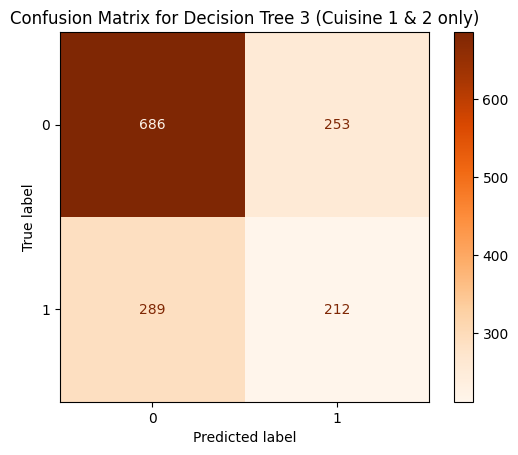

Decision Tree 3 Metrics (Only Cuisine1 & Cuisine2):
True Positives: 212
Sensitivity: 42.32 %
Specificity: 73.06 %
Accuracy: 62.36 %


In [3273]:
# Step 1: Keep only Cuisine1, Cuisine2, Pricing_for_2, Locality
selected_cuisine_cols = ['Cuisine1', 'Cuisine2']
keep_cols = selected_cuisine_cols + ['Pricing_for_2', 'Locality in Pune']

X_subset = zomato_for_eda[keep_cols].copy()
X_subset[selected_cuisine_cols] = X_subset[selected_cuisine_cols].replace(0, -1)

# Step 2: Keep only numeric columns
X_dt3 = X_subset.select_dtypes(include=[np.number])
y_dt3 = zomato_for_eda['isHighRating']

# Step 3: Split 70/30
X_train3, X_other3, y_train3, y_other3 = train_test_split(X_dt3, y_dt3, test_size=0.3, random_state=45)

# Step 4: Train DT3
dec_tree3 = DecisionTreeClassifier(random_state=45)
dec_tree3.fit(X_train3, y_train3)

# Step 5: Predict + Confusion Matrix
y_pred3 = dec_tree3.predict(X_other3)
cm3 = confusion_matrix(y_other3, y_pred3)
cm_display3 = ConfusionMatrixDisplay(cm3, display_labels=dec_tree3.classes_)
cm_display3.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix for Decision Tree 3 (Cuisine 1 & 2 only)")
plt.show()

# Step 6: Metrics
tn3, fp3, fn3, tp3 = cm3.ravel()
sensitivity3 = tp3 / (tp3 + fn3) if (tp3 + fn3) != 0 else 0
specificity3 = tn3 / (tn3 + fp3) if (tn3 + fp3) != 0 else 0
accuracy3 = accuracy_score(y_other3, y_pred3)

print(f"Decision Tree 3 Metrics (Only Cuisine1 & Cuisine2):")
print(f"True Positives: {tp3}")
print(f"Sensitivity: {sensitivity3*100:.2f} %")
print(f"Specificity: {specificity3*100:.2f} %")
print(f"Accuracy: {accuracy3*100:.2f} %")


## **DT Plotting**

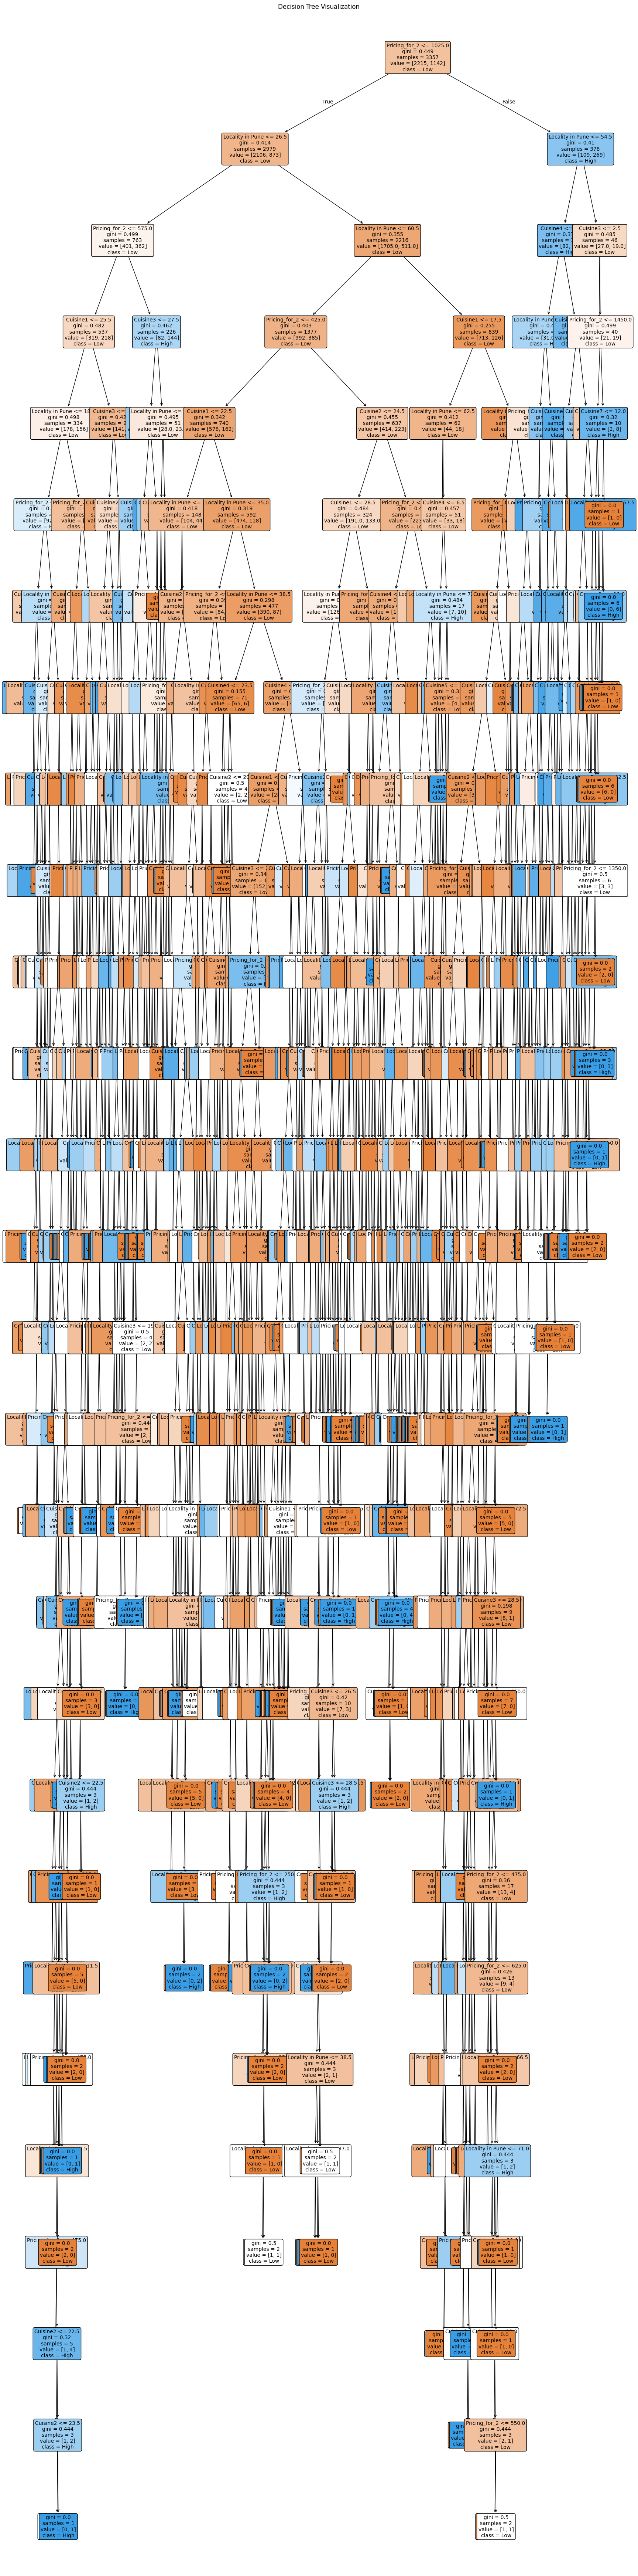

In [3274]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 90))  # Resize for visibility
plot_tree(dec_tree, 
          feature_names=X_train.columns, 
          class_names=["Low", "High"], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


### **Post Decision Tree Implementation (DT1, DT2, and DT3)**

DT2 Implementation findings show us that even ommitting the ` MISSING ` values present the same metrics as it would in DT1. Furthermore, removing `Cuisines 3-8` and focusing on ` Cuisine 1-2 ` barely made significant changes to the accuracy.


---


## **VII. Mixed Naive Bayes (MNB)**

Implementing MNB to the cleaned dataset (_same with cleaned dataset of DT3_). 

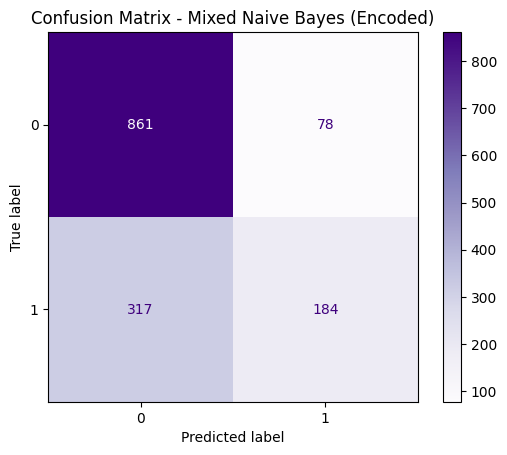

In [3275]:
# Select features
X_cat = zomato_for_eda[['Cuisine1', 'Cuisine2', 'Locality in Pune']].copy()
X_num = zomato_for_eda[['Pricing_for_2']]
y = zomato_for_eda['isHighRating']

# Categorical values using LabelEncoder
for col in X_cat.columns:
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(X_cat[col].astype(str))  # Ensures all values are strings and encodable

# Concatenate all features
X_full = pd.concat([X_cat, X_num], axis=1)

# Identify categorical feature indices
categorical_indices = list(range(X_cat.shape[1]))  # [0, 1, 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.3, random_state=45)

# Train MixedNB
mnb = MixedNB(categorical_features=categorical_indices)
mnb.fit(X_train.values, y_train)

# Predict and evaluate
y_pred = mnb.predict(X_test.values)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cm_display.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Mixed Naive Bayes (Encoded)")
plt.show()


In [3276]:
# Metrics
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_pred)

print(f"Mixed Naive Bayes Metrics:")
print(f"True Positives: {tp}")
print(f"Sensitivity: {sensitivity*100:.2f} %")
print(f"Specificity: {specificity*100:.2f} %")
print(f"Accuracy: {accuracy*100:.2f} %")

Mixed Naive Bayes Metrics:
True Positives: 184
Sensitivity: 36.73 %
Specificity: 91.69 %
Accuracy: 72.57 %


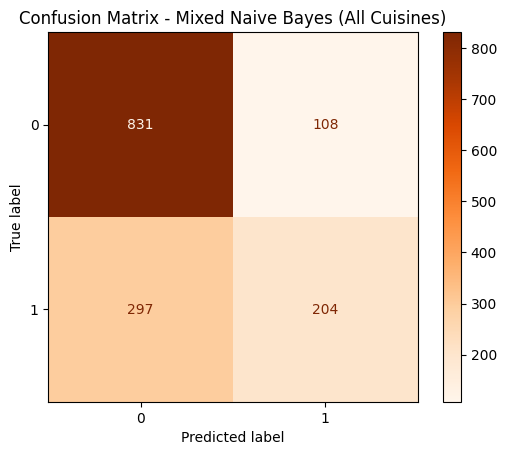

In [3277]:
from mixed_naive_bayes import MixedNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Features
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]
categorical_cols = cuisine_cols + ['Locality in Pune']
numerical_cols = ['Pricing_for_2']

X_cat = zomato_for_eda[categorical_cols].copy()
X_num = zomato_for_eda[numerical_cols].copy()
y = zomato_for_eda['isHighRating']

# Split
X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_cat, X_num, y, test_size=0.3, random_state=45
)

# Manual reindexing of categorical values
X_cat_train_encoded = X_cat_train.copy()
X_cat_test_encoded = X_cat_test.copy()

for col in categorical_cols:
    train_unique = sorted(X_cat_train[col].dropna().unique())
    label_map = {val: idx for idx, val in enumerate(train_unique)}
    
    X_cat_train_encoded[col] = X_cat_train[col].map(label_map)
    X_cat_test_encoded[col] = X_cat_test[col].map(label_map).fillna(-1).astype(int)

# Combine features
X_train = pd.concat([X_cat_train_encoded.reset_index(drop=True), X_num_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_cat_test_encoded.reset_index(drop=True), X_num_test.reset_index(drop=True)], axis=1)

categorical_indices = list(range(len(categorical_cols)))  # [0–8]

# Train MNB2
mnb2 = MixedNB(categorical_features=categorical_indices)
mnb2.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred2 = mnb2.predict(X_test.to_numpy())

# Evaluation
cm2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm2, display_labels=[0, 1]).plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - Mixed Naive Bayes (All Cuisines)")
plt.show()


In [3278]:
# Metrics
tn2, fp2, fn2, tp2 = cm2.ravel()
sensitivity2 = tp2 / (tp2 + fn2)
specificity2 = tn2 / (tn2 + fp2)
accuracy2 = accuracy_score(y_test, y_pred2)

print(f"Mixed Naive Bayes 2 (All Cuisines) Metrics:")
print(f"True Positives: {tp2}")
print(f"Sensitivity: {sensitivity2*100:.2f} %")
print(f"Specificity: {specificity2*100:.2f} %")
print(f"Accuracy: {accuracy2*100:.2f} %")

Mixed Naive Bayes 2 (All Cuisines) Metrics:
True Positives: 204
Sensitivity: 40.72 %
Specificity: 88.50 %
Accuracy: 71.88 %


## **VIII. General Finding and Analysis**

### **Exploratory Data Analysis (EDA)**
EDA presented...

### **Decision Tree Implementations (DT1, DT2, and DT3)**
DT1 and DT2 unfortunately ...


### **Mixed Naive Bayes Implementation (MNB1 & MNB2)**
MNB presented...

## **IX. Conclusion**

Based on the findings, it is evident that DT2 and MNB was able to accurately predict... as such, we think it would be more accurate to remove _"Junk"_ data such as `MISSING, NULL, -12931931, 13412131` that can affect the model in predicting. 

In the case of predicting ` dining ratings `, it is possible that there could be a better model to be used since **Decision Trees** and **Mixed Naive Bayes** are only able to get `x%` and `y%`. Judging from the dataset, it may be even viable to use **Ensemble Learning Models (random forest)**, or the need to heavily manipulate the data to accomodate ` MISSING ` values and so on...

## **X. References**